In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay

In [3]:
df=pd.read_csv('diabetes.csv')

In [4]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

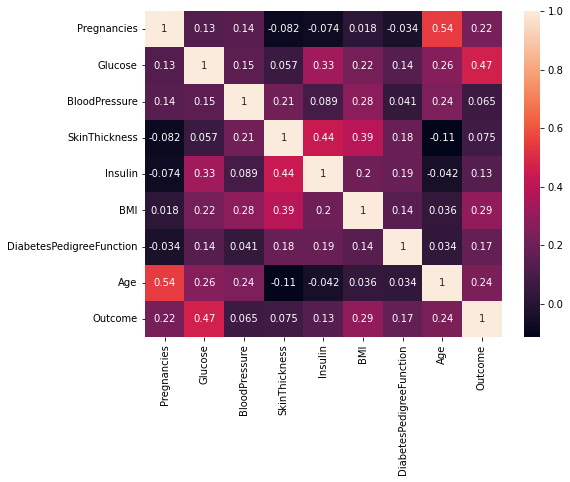

In [6]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True)

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df['Insulin'].value_counts()

0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: Insulin, Length: 186, dtype: int64

In [8]:
df.shape

(768, 9)

In [9]:
df['Insulin'].value_counts()

0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: Insulin, Length: 186, dtype: int64

In [12]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
df['Pregnancies'].values

array([ 6,  1,  8,  1,  0,  5,  3, 10,  2,  8,  4, 10, 10,  1,  5,  7,  0,
        7,  1,  1,  3,  8,  7,  9, 11, 10,  7,  1, 13,  5,  5,  3,  3,  6,
       10,  4, 11,  9,  2,  4,  3,  7,  7,  9,  7,  0,  1,  2,  7,  7,  1,
        1,  5,  8,  7,  1,  7,  0,  0,  0,  2,  8,  5,  2,  7,  5,  0,  2,
        1,  4,  2,  5, 13,  4,  1,  1,  7,  5,  0,  2,  3,  2,  7,  0,  5,
        2, 13,  2, 15,  1,  1,  4,  7,  4,  2,  6,  2,  1,  6,  1,  1,  1,
        0,  1,  2,  1,  1,  4,  3,  0,  3,  8,  1,  4,  7,  4,  5,  5,  4,
        4,  0,  6,  2,  5,  0,  1,  3,  1,  1,  0,  4,  9,  3,  8,  2,  2,
        0,  0,  0,  5,  3,  5,  2, 10,  4,  0,  9,  2,  5,  2,  1,  4,  9,
        1,  8,  7,  2,  1,  2, 17,  4,  7,  0,  2,  0,  6,  3,  4,  4,  3,
        6,  6,  2,  1,  2,  8,  6,  0,  5,  5,  6,  0,  1,  5,  4,  7,  8,
        1,  8,  5,  3,  9,  7, 11,  8,  5,  1,  3,  4,  4,  0,  1,  0,  2,
        6,  5,  8,  5,  1,  7,  2,  0,  7,  0,  9, 12,  5,  6,  5,  5,  0,
        2,  7,  7,  1,  1

In [16]:
percentile25 = df['Insulin'].quantile(0.25)
percentile75 = df['Insulin'].quantile(0.75)

In [17]:
iqr=percentile75-percentile25

In [18]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [19]:
df[df['Insulin'] > upper_limit]
df[df['Insulin'] < lower_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [20]:
df= df[df['Insulin'] < upper_limit]

In [21]:
df= df[df['Insulin'] > lower_limit]

In [22]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000
mean,3.841962,119.182561,68.990463,19.985014,62.328338,31.854087,0.466918,33.185286,0.339237
std,3.383143,31.266437,19.613487,15.951788,79.132557,7.919395,0.322066,11.714824,0.473773
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.100000,0.243250,24.000000,0.000000
50%,3.000000,115.000000,72.000000,22.000000,0.000000,32.000000,0.368000,29.000000,0.000000
75%,6.000000,137.000000,80.000000,32.000000,115.000000,36.400000,0.613750,40.750000,1.000000
max,17.000000,199.000000,122.000000,99.000000,318.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:>

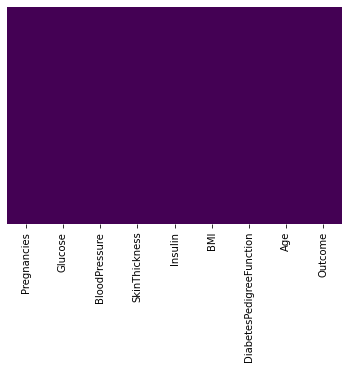

In [23]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
df['BMI'].value_counts()

In [28]:
X=df.iloc[:,0:8]

In [29]:
Y=df.iloc[:,8]

In [30]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 734, dtype: int64

In [31]:
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.2, random_state=1)

In [32]:
X_train.shape

(587, 8)

In [33]:
X_train.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
79,2,112,66,22,0,25.0,0.307,24
202,0,108,68,20,0,27.3,0.787,32
743,9,140,94,0,0,32.7,0.734,45
144,4,154,62,31,284,32.8,0.237,23
754,8,154,78,32,0,32.4,0.443,45


In [34]:
X_train.fillna(value=X_train.median, inplace=True)

In [35]:
X_train['Glucose']=X_train['Glucose'].replace(0, np.NaN)

In [36]:
X_train.isnull().sum()

Pregnancies                 0
Glucose                     3
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [37]:
X_train['Insulin']=X_train['Insulin'].replace(0, np.NaN)

In [38]:
X_train['BloodPressure']=X_train['BloodPressure'].replace(0, np.NaN)
X_train['SkinThickness']=X_train['SkinThickness'].replace(0, np.NaN)
X_train['BMI']=X_train['BMI'].replace(0, np.NaN)
X_train['Glucose']=X_train['Glucose'].replace(0, np.NaN)

In [39]:
X_train.isnull().sum()

Pregnancies                   0
Glucose                       3
BloodPressure                27
SkinThickness               184
Insulin                     305
BMI                           8
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [40]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
79,2,112.0,66.0,22.0,NaN,25.0,0.307,24
202,0,108.0,68.0,20.0,NaN,27.3,0.787,32
743,9,140.0,94.0,NaN,NaN,32.7,0.734,45
144,4,154.0,62.0,31.0,284.0,32.8,0.237,23
754,8,154.0,78.0,32.0,NaN,32.4,0.443,45
...,...,...,...,...,...,...,...,...
674,8,91.0,82.0,NaN,NaN,35.6,0.587,68
748,3,187.0,70.0,22.0,200.0,36.4,0.408,36
75,1,NaN,48.0,20.0,NaN,24.7,0.140,22
245,9,184.0,85.0,15.0,NaN,30.0,1.213,49


<AxesSubplot:>

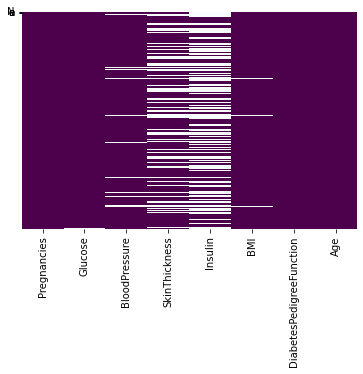

In [41]:
sns.heatmap(X_train.isnull(), cmap='BuPu_r', cbar=False, yticklabels='None')

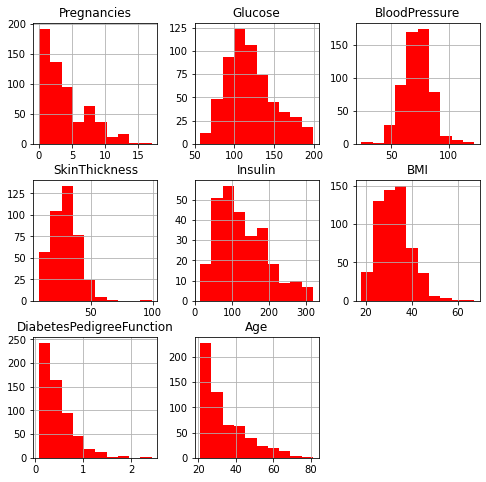

In [43]:
X_train.hist(color='red',figsize=(8,8))
plt.show()

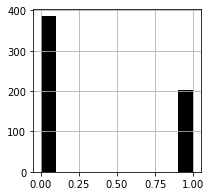

In [45]:
y_train.hist(color='black',figsize=(3,3))
plt.show()

In [46]:
X_train.fillna(X_train.median(), inplace=True)

In [47]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
79,2,112.0,66.0,22.0,120.0,25.0,0.307,24
202,0,108.0,68.0,20.0,120.0,27.3,0.787,32
743,9,140.0,94.0,29.0,120.0,32.7,0.734,45
144,4,154.0,62.0,31.0,284.0,32.8,0.237,23
754,8,154.0,78.0,32.0,120.0,32.4,0.443,45
...,...,...,...,...,...,...,...,...
674,8,91.0,82.0,29.0,120.0,35.6,0.587,68
748,3,187.0,70.0,22.0,200.0,36.4,0.408,36
75,1,115.0,48.0,20.0,120.0,24.7,0.140,22
245,9,184.0,85.0,15.0,120.0,30.0,1.213,49


In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [50]:
X_train

array([[-0.53498699, -0.27205017, -0.53415007, ..., -1.08499402,
        -0.48781118, -0.77557037],
       [-1.12751031, -0.40593694, -0.36341983, ..., -0.75115541,
         0.97088533, -0.09493526],
       [ 1.53884464,  0.66515725,  1.85607334, ...,  0.03263958,
         0.80982093,  1.01109679],
       ...,
       [-0.83124865, -0.17163509, -2.07072226, ..., -1.12853818,
        -0.99531601, -0.94572915],
       [ 1.53884464,  2.13791176,  1.08778724, ..., -0.35925792,
         2.26547849,  1.35141434],
       [ 0.05753634, -0.30552186, -0.02195934, ...,  0.67128735,
         2.80337283,  1.94697007]])

In [49]:
X_test = scaler.transform(X_test)

# Logistic Regression

In [51]:
LR=LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [52]:
y_pred=LR.predict(X_test)

In [53]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

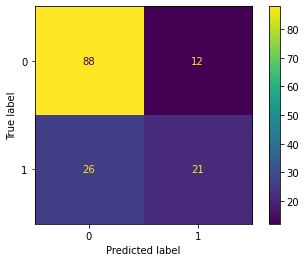

In [54]:
cfm=confusion_matrix(y_test, y_pred)
cfm_display=ConfusionMatrixDisplay(confusion_matrix=cfm)
cfm_display.plot()

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       100
           1       0.64      0.45      0.52        47

    accuracy                           0.74       147
   macro avg       0.70      0.66      0.67       147
weighted avg       0.73      0.74      0.73       147



In [ ]:
df.head(5)

# SVM

In [56]:
from sklearn.svm import SVC

In [57]:
for k in ('linear', 'poly', 'rbf', 'sigmoid'):
    model = SVC(kernel=k)
    model.fit(X_train, y_train)
    y_pred2 = model.predict(X_train)
    print(k)
    print(accuracy_score(y_train, y_pred2))

linear
0.787052810902896
poly
0.7989778534923339
rbf
0.82793867120954
sigmoid
0.6746166950596252


In [58]:
SVC=SVC(kernel='rbf')
SVC.fit(X_train, y_train)

SVC()

In [59]:
y_pred2=SVC.predict(X_test)

In [60]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81       100
           1       0.61      0.23      0.34        47

    accuracy                           0.71       147
   macro avg       0.67      0.58      0.58       147
weighted avg       0.69      0.71      0.66       147



# Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=44)

In [63]:
rf_model = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=44)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=44)

In [64]:
predictions = rf_model.predict(X_test)
predictions

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0], dtype=int64)

In [68]:
importance=rf_model.feature_importances_

In [69]:
columns=X.columns

In [70]:
df_imp=pd.DataFrame(data=importance, index=columns)

In [71]:
df_imp.reset_index(inplace=True)

In [72]:
df_imp

,index,0
0,Pregnancies,0.092848
1,Glucose,0.239415
2,BloodPressure,0.092547
3,SkinThickness,0.065102
4,Insulin,0.069601
5,BMI,0.186728
6,DiabetesPedigreeFunction,0.118283
7,Age,0.135477


In [73]:
df_imp.rename(columns=
              {'index': 'Feature' , 0:'Importance'}, inplace=True )

In [74]:
df_imp

,Feature,Importance
0,Pregnancies,0.092848
1,Glucose,0.239415
2,BloodPressure,0.092547
3,SkinThickness,0.065102
4,Insulin,0.069601
5,BMI,0.186728
6,DiabetesPedigreeFunction,0.118283
7,Age,0.135477


In [75]:
importance

array([0.09284765, 0.23941469, 0.09254743, 0.06510188, 0.06960089,
       0.18672781, 0.11828287, 0.13547679])

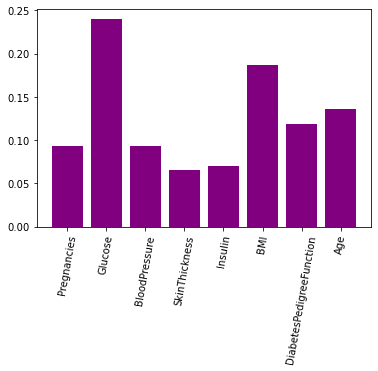

In [76]:
plt.bar(df_imp['Feature'], df_imp['Importance'], color='purple')
plt.xticks(rotation=80)
plt.show()

In [65]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.92      0.81       135
           1       0.77      0.43      0.55        86

    accuracy                           0.73       221
   macro avg       0.74      0.67      0.68       221
weighted avg       0.74      0.73      0.71       221



In [ ]:
sns.boxplot( x=df["species"], y=df["sepal_length"] )